In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [3]:
pi_true = np.array([0.35, 0.45, 0.2]);
mu_true = np.array([-1, 3, 1, 5, 3, 7]).reshape((3,2));
sigma_true = np.zeros((3,2,2));
sigma_true[0,:,:] = np.array([0.9, 0.1, 0.1, 0.9]).reshape(2,2);
sigma_true[1,:,:] = np.array([0.3, 0.7, 0.3, 0.7]).reshape(2,2);
sigma_true[2,:,:] = np.array([0.7, 0.3, 0.7, 0.3]).reshape(2,2);
col = ['r', 'g', 'b', 'k', 'c'];

N = 100;
v = np.zeros((np.size(pi_true), N, 2));
C = np.zeros((np.size(pi_true), 1)).astype(int);
obs = np.zeros((N,2));

for i in range(N):
    z = np.random.uniform(0,1,1)[0];
    idx = 0;
    sum2 = 0;
    
    for j in range(np.size(pi_true)):
        if (z>=sum2) & (z<=sum2+pi_true[j]):
            idx = j;
            break;
        else:
            sum2 = sum2 + pi_true[j];
    
    v_temp = np.random.multivariate_normal(mu_true[idx,:], sigma_true[idx,:,:],2);
    C[idx] = C[idx] + 1;
    v[idx, C[idx], 0] = v_temp[0][0];
    v[idx, C[idx], 1] = v_temp[1][0];
    obs[i,0] = v_temp[0][0];
    obs[i,1] = v_temp[1][0];

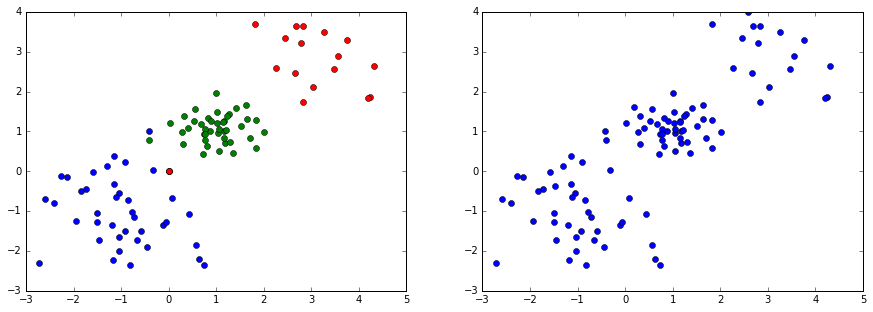

In [4]:
plt.figure(1, figsize=(15,5));
plt.subplot(1,2,1)
for i in range(np.size(pi_true)):
    plt.plot(v[i,np.array(range(C[i])),0], v[i,np.array(range(C[i])),1], "o");

plt.subplot(1,2,2)
plt.plot(obs[:,0], obs[:,1], "o");
plt.show()